## Neural Network from Scratch

## PRE-PROCESSING

Split data into training and testing and transpose it.

## Barebones Implementation of a Neural Network with two (2) input nodes, two (2) hidden layers five (5) nodes each  and one output node with ```make_moons``` data set.

### EDA

In [1]:
# import libraries and modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# load dataset
S, w = make_moons(noise=0.2, random_state=1, n_samples=600)

Visualize Entire Dataset

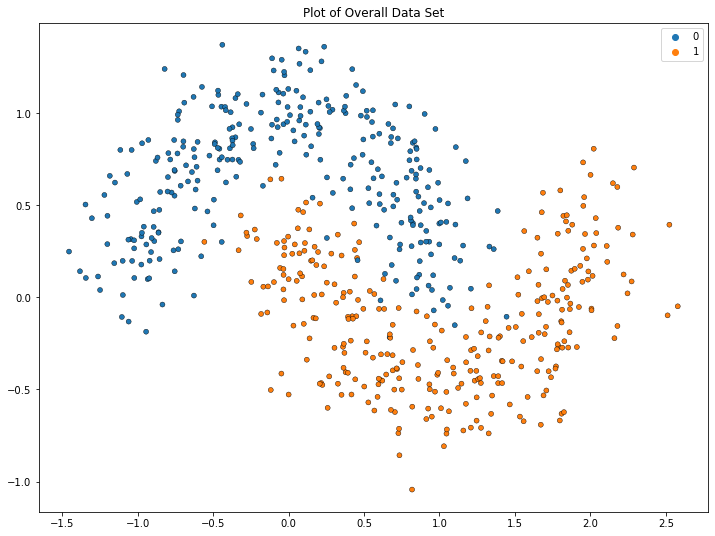

In [2]:
# Visualize Entire Data set
plt.figure(figsize=(12,9))
sns.scatterplot(
    x=S[:, 0], y=S[:, 1], hue=w, marker="o", s=25, edgecolor="k", legend=True
).set_title("Plot of Overall Data Set")
plt.show()

In [14]:
m, n = S.shape
n

2

### Data Pre-processing

Split Data into Train and Test Data Set.

In [4]:
X_tr, X_te, y_tr, y_te = train_test_split(S, w, test_size=0.1, random_state=42)

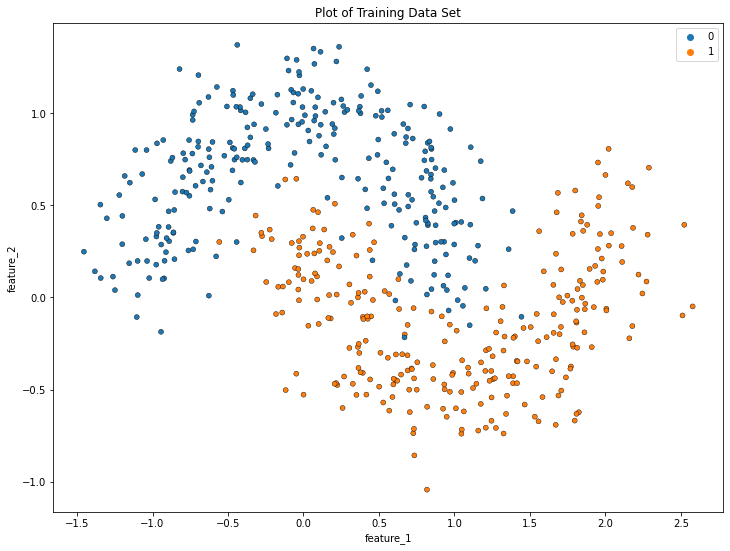

In [5]:
# Visualize Training Data Set
plt.figure(figsize=(12,9))
sns.scatterplot(
    x=X_tr[:, 0], y=X_tr[:, 1], hue=y_tr, marker="o", s=25, edgecolor="k", legend=True
).set_title("Plot of Training Data Set")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.show()

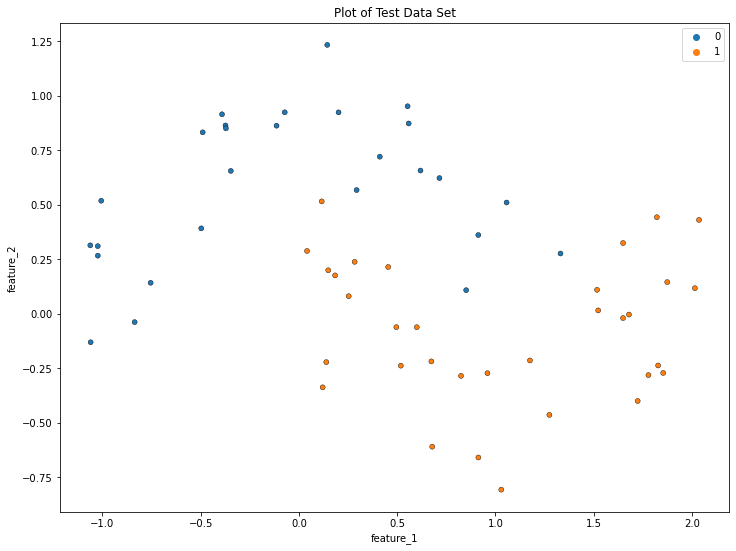

In [6]:
# Visualize Test Data Set
plt.figure(figsize=(12,9))
sns.scatterplot(
    x=X_te[:, 0], y=X_te[:, 1], hue=y_te, marker="o", s=25, edgecolor="k", legend=True
).set_title("Plot of Test Data Set")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.show()

### Prepare Data For Neural Network
1. Transpose features so that predictors are in rows.
2. Add an intercept term to features

In [7]:
X_tr.shape

(540, 2)

In [8]:
# transpose training and test data sets
X_tr = X_tr.T
X_te = X_te.T

In [9]:
# add a constant term to X_train (now X_trc is a (p+1) x m matrix)
X_trc = np.vstack((np.ones((1, X_tr.shape[1])), X_tr))

# add a constant term to X_tec (now X_train_c is a (p+1) x m matrix)
X_tec = np.vstack((np.ones((1, X_te.shape[1])), X_te))

X_trc.shape

(3, 540)

In [10]:
# import modules for Xavier initialization
from math import sqrt
from numpy import mean
from numpy.random import rand
# example of the xavier weight initialization
# number of nodes in the previous layer
# calculate the range for the weights
# n is the number of columns of the original data set
lower, upper = -(1.0 / sqrt(n)), (1.0 / sqrt(n))

# generate random numbers 
numbers = rand(1000)

# scale to the desired range
scaled = lower + numbers * (upper - lower)

In [11]:
X_trc.shape

(3, 540)

In [12]:
def init_params():
    # Xavier Weight Initialization - gives more accurate predictions
    W1 = np.random.uniform(scaled.min(), scaled.max(), size=(5, 3))
    W2 = np.random.uniform(scaled.min(), scaled.max(), size=(5, 5))
    W3 = np.random.uniform(scaled.min(), scaled.max(), size=(1, 5))

    # Random Weight Initialization - less optimal weight initialization
    #W1 = np.random.rand(10, 784) - 0.5
    #b1 = np.random.rand(10, 1) - 0.5
    #W2 = np.random.rand(10, 10) - 0.5
    #b2 = np.random.rand(10, 1) - 0.5
    return W1, W2, W3

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_deriv(Z):
    f = 1 / (1 + np.exp(-Z))
    return f * (1 - f)

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np .exp(Z))
    return A

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def forward_prop(W1, W2, W3, X):
    Z1 = W1.dot(X)
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1)
    A2 = sigmoid(Z2)
    Z3 = W3.dot(A2)
    A3 = sigmoid(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    dZ3 = (A3.ravel() - Y) * sigmoid_deriv(Z3)
    dW3 = 1 / m * dZ3.dot(A2.T)
    dZ2 = W3.T.dot(dZ3) * sigmoid_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    dZ1 = W2.T.dot(dZ2) * sigmoid_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    return dW1, dW2, dW3

def update_params(W1, W2, W3, dW1, dW2, dW3, alpha):
    W1 = W1 - alpha * dW1  
    W2 = W2 - alpha * dW2
    W3 = W3 - alpha * dW3     
    return W1, W2, W3

def get_predictions(A3, thresh=0.5):
    '''This returns the index of the maximun values along each column
    A2 is 10 x m matrix so each column represents a sample and the range of possible
    indices is from 0 to 9 and this corresponds to the number of labels'''
    return np.where(A3 > thresh, 1, 0)
    
def get_accuracy(predictions, Y):
    print(f"Prediction:{predictions} \n Actual:{Y}")
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, W2, W3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, W2, W3, X)
        dW1, dW2, dW3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, W2, W3 = update_params(W1, W2, W3, dW1, dW2, dW3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)[0]
            print(f"Accuracy: {get_accuracy(predictions, Y):0.2f}")
    return W1, W2, W3


In [13]:
W1, W2, W3 = gradient_descent(X_trc, y_tr, 1, 1000)

Iteration:  0
Prediction:[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

To guide you in the right direction with this problem, please find a skeleton of a neural network class below. You absolutely MAY use additional methods beyond those suggested in this template, but the methods listed below are the minimum required to implement the model cleanly.

**Strategies for debugging**. One of the greatest challenges of this implementations is that there are many parts and a bug could be present in any of them. Here are some recommended tips:
- *Development environment*. Consider using an Integrated Development Environment (IDE). Jupyter is great, but not always the easiest for debugging. There are a number of IDE's out there and something like PyCharm or Spyder. For a video on using and debugging in Spyder, see [my video on this topic](https://www.youtube.com/watch?v=zYNRqVimU3Q).
- *Unit tests*. I would strongly encourage you to create unit tests for most modules. Without doing this will make your code extremely difficult to bug. You can create simple examples to feed through the network to validate it is correctly computing activations and node values. Also, if you manually set the weights of the model, you can even calculate backpropagation by hand for some simple examples (admittedly, that unit test would be challenging and is optional, but a unit test is possible). 
- *Compare against a similar architecture*. You can also verify the performance of your overall neural network by comparing it against the `scikit-learn` implementation and using the same architecture and parameters as your model (your model outputs will certainly not be identical, but they should be somewhat similar).

**(b)** Apply your neural network. 
- Create a training and validation dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. 
- Train and test your model on this dataset plotting your learning curves (training and validation error for each epoch of stochastic gradient descent, where an epoch represents having trained on each of the training samples one time). 
- Tune the learning rate and number of training epochs for your model to improve performance as needed. 
- In two subplots, plot the training data on one subplot, and the validation data on the other subplot. On each plot, also plot the decision boundary from your neural network trained on the training data. 
- Report your performance on the test data with an ROC curve and compare against the `scikit-learn` `MLPClassifier` trained with the same parameters.

**(c)** Suggest two ways in which you neural network implementation could be improved: are there any options we discussed in class that were not included in your implementation that could improve performance?

In [ ]:
# import modules for Xavier initialization
from math import sqrt
from numpy import mean
from numpy.random import rand

class myNeuralNetwork(object):
    # n_in = 3, n_layer1 = 5, n_layer2 = 5, n_out = 1, learning_rate=1
    def __init__(self, n_in, n_layer1, n_layer2, n_out, learning_rate):
        '''__init__
        Class constructor: Initialize the parameters of the network including
        the learning rate, layer sizes, and each of the parameters
        of the model (weights, placeholders for activations, inputs, 
        deltas for gradients, and weight gradients). This method
        should also initialize the weights of your model randomly
            Input:
                n_in:          number of inputs
                n_layer1:      number of nodes in layer 1
                n_layer2:      number of nodes in layer 2
                n_out:         number of output nodes
                learning_rate: learning rate for gradient descent
            Output:
                none
        '''
        # Xavier weight initialization
        # n is the number of columns of the original data set
        n = 2
        lower, upper = -(1.0 / sqrt(n)), (1.0 / sqrt(n))
        # generate random numbers 
        numbers = rand(1000)
        # scale to the desired range
        scaled = lower + numbers * (upper - lower)

        # Xavier weights
        self.W1 = np.random.uniform(scaled.min(), scaled.max(), size=(n_layer1, n_in))
        self.W2 = np.random.uniform(scaled.min(), scaled.max(), size=(n_layer2, n_layer1))
        self.W3 = np.random.uniform(scaled.min(), scaled.max(), size=(n_out, n_layer2))

        # placeholders for units
        self.Z1 = None
        self.Z2 = None
        self.Z3 = None

        # placeholders for activation
        self.A1 = None
        self.A2 = None
        self.A3 = None

        # placeholders for gradients of weights
        self.dW3 = None
        self.dW2 = None
        self.dW1 = None


    # need to figure out how to do this properly
    def forward_propagation(self, x):
        '''forward_propagation
        Takes a vector of your input data (one sample) and feeds
        it forward through the neural network, calculating activations and
        layer node values along the way.
            Input:
                x: a vector of data representing 1 sample [n_in x 1]
            Output:
                y_hat: a vector (or scaler of predictions) [n_out x 1]
                (typically n_out will be 1 for binary classification)
        '''
        self.Z1 = self.W1.dot(x)
        self.A1 = self.self.sigmoid(self.Z1)
        self.Z2 = self.W2.dot(self.A1)
        self.A2 = self.sigmoid(self.Z2)
        self.Z3 = self.W3.dot(self.A2)
        self.A3 = self.sigmoid(self.Z3)

        return self.A3


    def compute_loss(self, X, y):
        '''compute_loss
        Computes the current loss/cost function of the neural network
        based on the weights and the data input into this function.
        To do so, it runs the X data through the network to generate
        predictions, then compares it to the target variable y using
        the cost/loss function
            Input:
                X: A matrix of N samples of data [N x n_in]
                y: Target variable [N x 1]
            Output:
                loss: a scalar measure of loss/cost
        '''
    
    def backpropagate(self, x, y):
        '''backpropagate
        Backpropagate the error from one sample determining the gradients
        with respect to each of the weights in the network. The steps for
        this algorithm are:
            1. Run a forward pass of the model to get the activations 
               Corresponding to x and get the loss function of the model 
               predictions compared to the target variable y
            2. Compute the deltas (see lecture notes) and values of the
               gradient with respect to each weight in each layer moving
               backwards through the network
    
            Input:
                x: A vector of 1 samples of data [n_in x 1]
                y: Target variable [scalar]
            Output:
                loss: a scalar measure of the loss/cost associated with x,y
                      and the current model weights
        '''
        #self.A3 = self.forward_propagation(self.X)
        dZ3 = (self.forward_propagation(self.X).ravel() - y) * sigmoid_deriv(self.Z3)
        self.dW3 = 1 / m * dZ3.dot(self.A2.T)
        dZ2 = W3.T.dot(dZ3) * sigmoid_deriv(self.Z2)
        self.dW2 = 1 / m * dZ2.dot(self.A1.T)
        dZ1 = W2.T.dot(dZ2) * sigmoid_deriv(self.Z1)
        self.dW1 = 1 / m * dZ1.dot(self.X.T)
        return self.dW1, self.dW2, self.dW3


        
    def stochastic_gradient_descent_step(self):
        '''stochastic_gradient_descent_step
        Using the gradient values computed by backpropagate, update each
        weight value of the model according to the familiar stochastic
        gradient descent update equation.
        
        Input: none
        Output: none
        '''
    
    def fit(self, X, y, max_epochs=, learning_rate=, get_validation_loss=):
        '''fit
            Input:
                X: A matrix of N samples of data [N x n_in]
                y: Target variable [N x 1]
            Output:
                training_loss:   Vector of training loss values at the end of each epoch
                validation_loss: Vector of validation loss values at the end of each epoch
                                 [optional output if get_validation_loss==True]
        '''
            
    def predict_proba(self, X):
        '''predict_proba
        Compute the output of the neural network for each sample in X, with the last layer's
        sigmoid activation providing an estimate of the target output between 0 and 1
            Input:
                X: A matrix of N samples of data [N x n_in]
            Output:
                y_hat: A vector of class predictions between 0 and 1 [N x 1]
        '''
    
    def predict(self, X, decision_thresh=):
        '''predict
        Compute the output of the neural network prediction for 
        each sample in X, with the last layer's sigmoid activation 
        providing an estimate of the target output between 0 and 1, 
        then thresholding that prediction based on decision_thresh
        to produce a binary class prediction
            Input:
                X: A matrix of N samples of data [N x n_in]
                decision_threshold: threshold for the class confidence score
                                    of predict_proba for binarizing the output
            Output:
                y_hat: A vector of class predictions of either 0 or 1 [N x 1]
        '''
        
        return np.where(A3 > thresh, 1, 0)

    def sigmoid(self, X):
        '''sigmoid
        Compute the sigmoid function for each value in matrix X
            Input:
                X: A matrix of any size [m x n]
            Output:
                X_sigmoid: A matrix [m x n] where each entry corresponds to the
                           entry of X after applying the sigmoid function
        '''
        return 1 / (1 + np.exp(-X))
        
    def sigmoid_derivative(self, X):
        '''sigmoid_derivative
        Compute the sigmoid derivative function for each value in matrix X
            Input:
                X: A matrix of any size [m x n]
            Output:
                X_sigmoid: A matrix [m x n] where each entry corresponds to the
                           entry of X after applying the sigmoid derivative function
        '''
        f = 1 / (1 + np.exp(-X))
        return f * (1 - f)